## Assignment 4

#### Medha Prodduturi (87683324)

### Part 1

In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
moonip = np.load('moon-all-input.npy')
moonop = np.load('moon-all-output.npy')

In [116]:
moonip.shape

(500, 2)

In [117]:
moonop.shape

(500,)

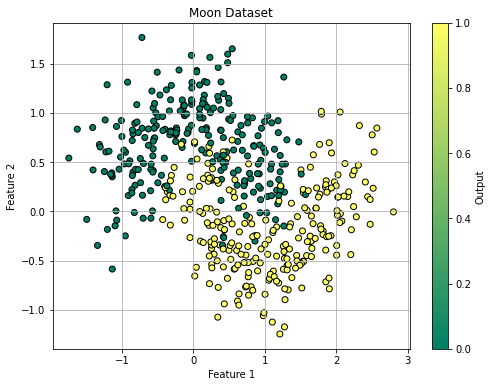

In [197]:
plt.figure(figsize=(8, 6))
plt.scatter(moonip[:, 0], moonip[:, 1], c=moonop, cmap='summer', edgecolors='k')
plt.title('Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Output')
plt.grid(True)
plt.show()

### Part 2

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test  = train_test_split(moonip, moonop, random_state=42)
len(X_train), len(X_test)

(375, 125)

In [121]:
len(y_train), len(y_test)

(375, 125)

### Part 3

In [122]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from collections import defaultdict

In [123]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), n_estimators=3000,
                            algorithm = "SAMME.R", learning_rate = 1, random_state=42)

In [175]:
learning_rate = 1 #as given in the instructions

totalSamples = len(X_train)
weight = (np.arange(totalSamples) + 1) / (totalSamples)

classfiers = []
ensemPred = []

baseclf = DecisionTreeClassifier(max_depth=1, random_state=42)

def Kbaseclf(weight):
    baseclf.fit(X_train, y_train, sample_weight = weight)
    predop = baseclf.predict(X_train)
    y_pred = (predop==y_train)
    
    error_rate = np.sum(weight[~y_pred])/np.sum(weight)
    clfweight = learning_rate*np.log((1-error_rate)/error_rate) 
    
    accTrain = accuracy_score(y_train, predop)
    classfiers.append([clfweight, weight, error_rate, accTrain])
    
    weight[~y_pred] = weight[~y_pred]*np.exp(clfweight)
    weight = weight/np.sum(weight)
    
    test_predop = baseclf.predict(X_test)
    
    accTest = accuracy_score(y_test, test_predop)
    ensemPred.append([accTrain, accTest])
    
    return weight

In [176]:
for i in range(3000):
    weight = Kbaseclf(weight)

### Part 4

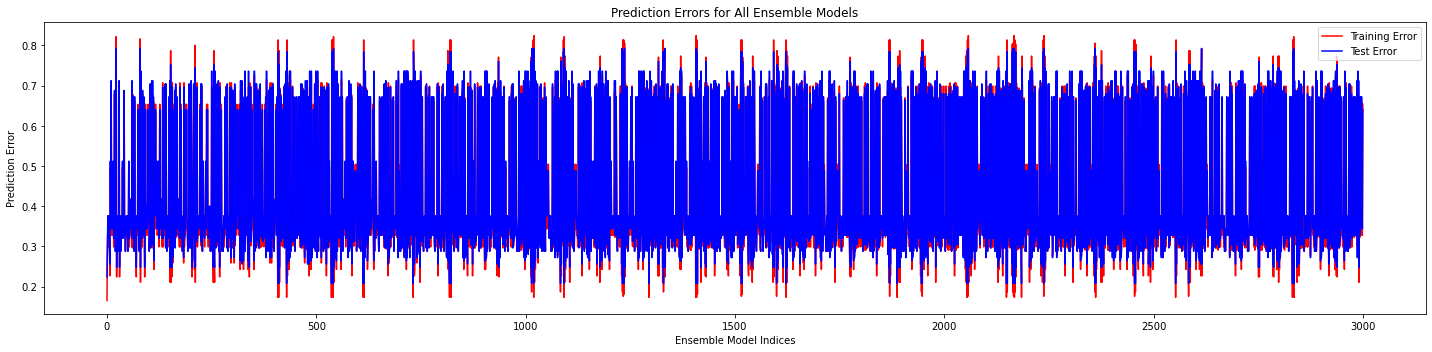

In [177]:
train_errors = [1 - pred[0] for pred in ensemPred]
test_errors = [1 - pred[1] for pred in ensemPred]

plt.figure(figsize=(20, 5))
plt.plot(range(3000), train_errors, label='Training Error', color='red')
plt.plot(range(3000), test_errors, label='Test Error', color='blue')
plt.xlabel('Ensemble Model Indices')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors for All Ensemble Models')
plt.legend()

plt.tight_layout()
plt.show()

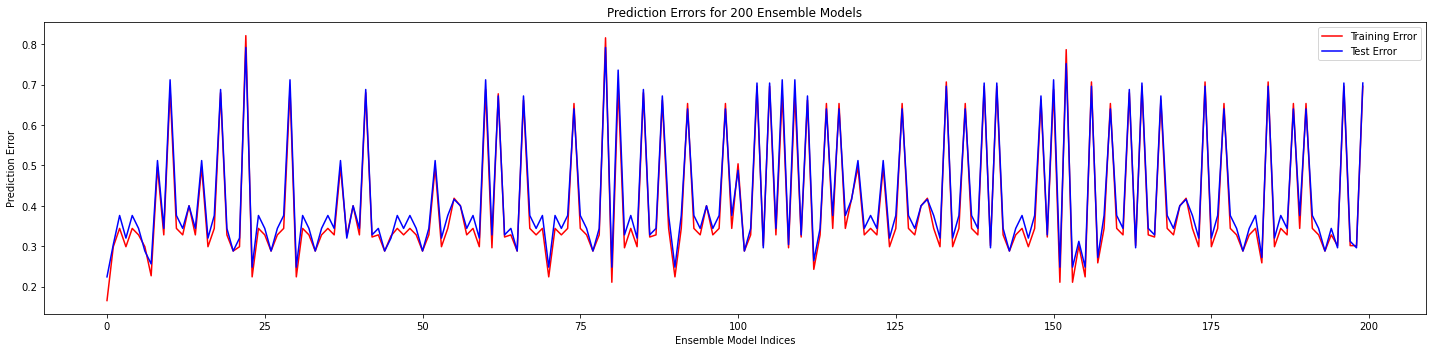

In [178]:
# Plotting for 200 ensemble models
plt.figure(figsize=(20, 5))

plt.plot(range(200), train_errors[:200], label='Training Error', color='red')
plt.plot(range(200), test_errors[:200], label='Test Error', color='blue')

plt.xlabel('Ensemble Model Indices')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors for 200 Ensemble Models')
plt.legend()

plt.tight_layout()
plt.show()


### Part 5

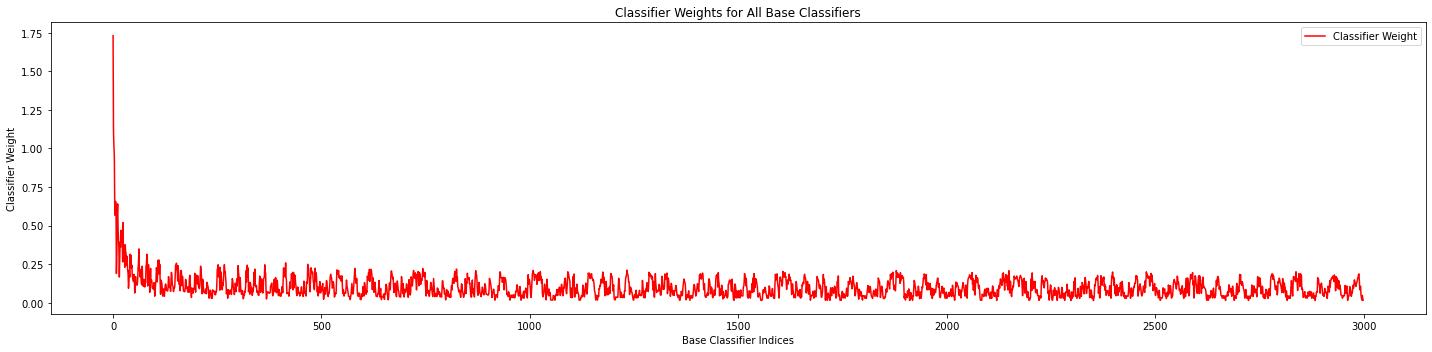

In [179]:
clfweights = [clf[0] for clf in classfiers]

plt.figure(figsize=(20, 5))
plt.plot(range(3000), clfweights, label='Classifier Weight', color='red')

plt.xlabel('Base Classifier Indices')
plt.ylabel('Classifier Weight')
plt.title('Classifier Weights for All Base Classifiers')
plt.legend()

plt.tight_layout()
plt.show()

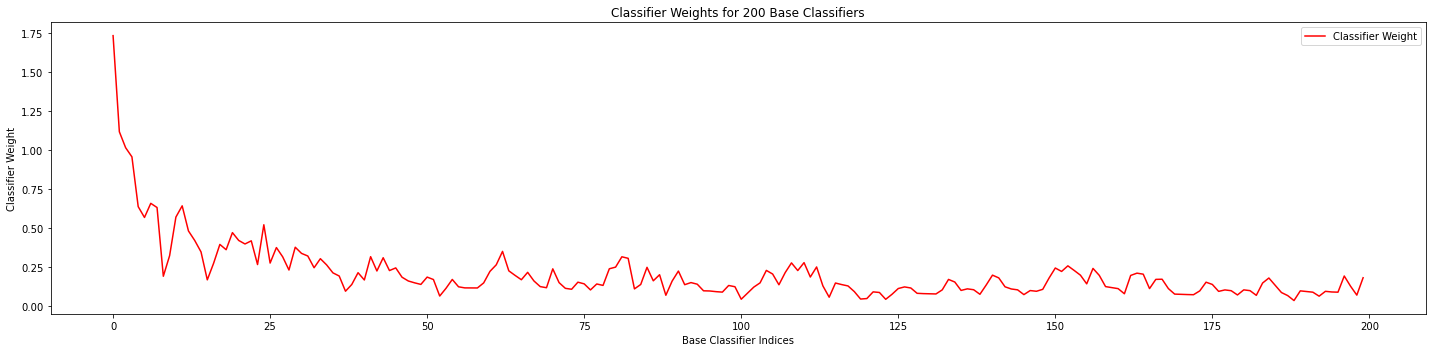

In [180]:
clfweights = [clf[0] for clf in classfiers]

plt.figure(figsize=(20, 5))
plt.plot(range(200), clfweights[:200], label='Classifier Weight', color='red')

plt.xlabel('Base Classifier Indices')
plt.ylabel('Classifier Weight')
plt.title('Classifier Weights for 200 Base Classifiers')
plt.legend()

plt.tight_layout()
plt.show()

### Part 6

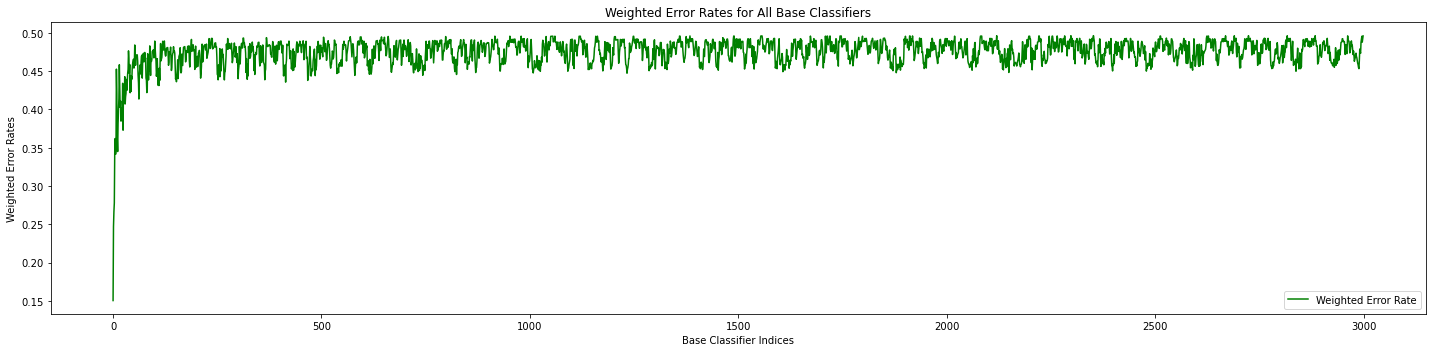

In [181]:
err_rates = [clf[2] for clf in classfiers]

plt.figure(figsize=(20, 5))
plt.plot(range(3000), err_rates, label='Weighted Error Rate', color='green')

plt.xlabel('Base Classifier Indices')
plt.ylabel('Weighted Error Rates')
plt.title('Weighted Error Rates for All Base Classifiers')
plt.legend()

plt.tight_layout()
plt.show()

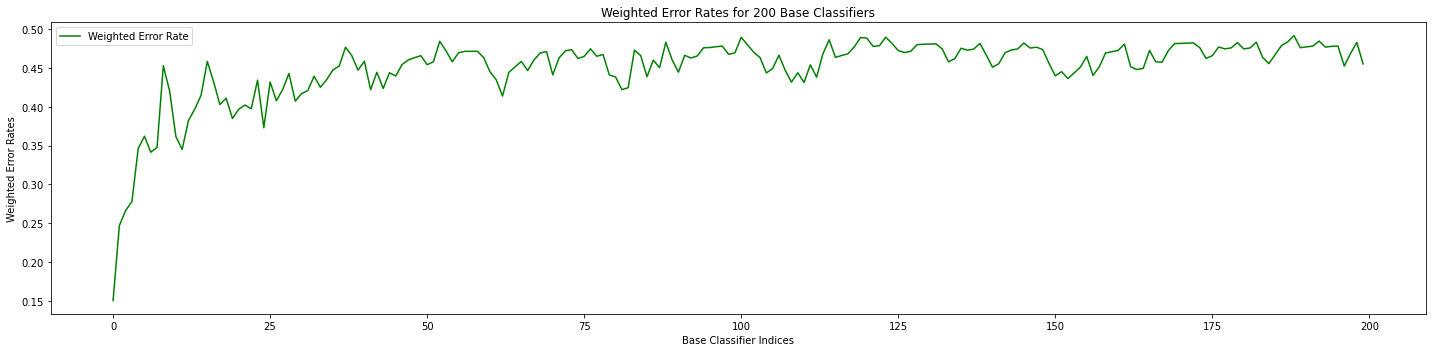

In [182]:
err_rates = [clf[2] for clf in classfiers]

plt.figure(figsize=(20, 5))
plt.plot(range(200), err_rates[:200], label='Weighted Error Rate', color='green')

plt.xlabel('Base Classifier Indices')
plt.ylabel('Weighted Error Rates')
plt.title('Weighted Error Rates for 200 Base Classifiers')
plt.legend()

plt.tight_layout()
plt.show()

### Part 7

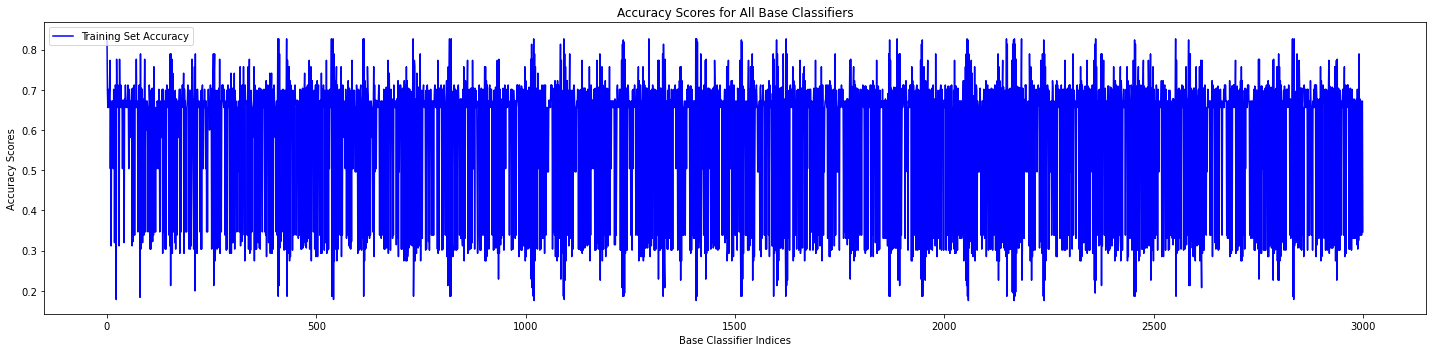

In [183]:
acc_scores = [clf[3] for clf in classfiers]

plt.figure(figsize=(20, 5))
plt.plot(range(3000), acc_scores, label='Training Set Accuracy', color='blue')

plt.xlabel('Base Classifier Indices')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores for All Base Classifiers')
plt.legend()

plt.tight_layout()
plt.show()

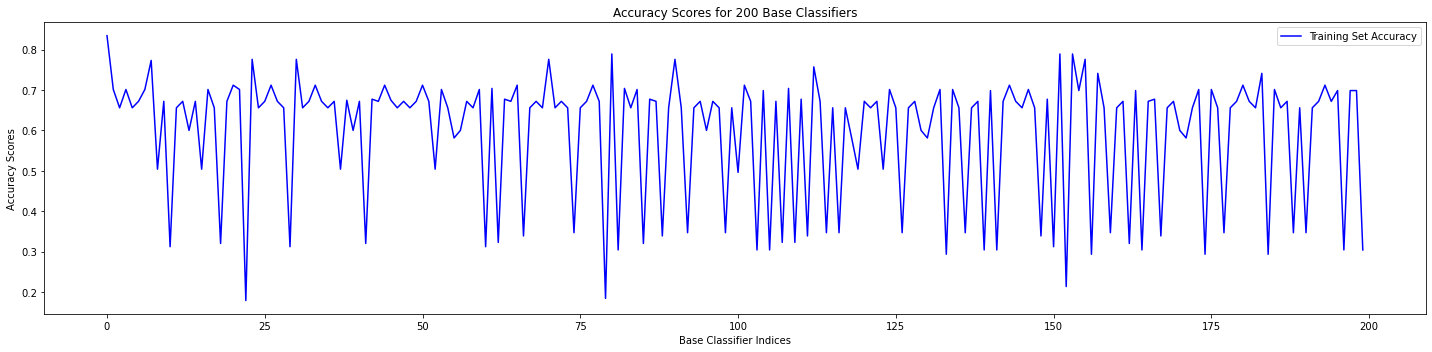

In [184]:
acc_scores = [clf[3] for clf in classfiers]

plt.figure(figsize=(20, 5))
plt.plot(range(200), acc_scores[:200], label='Training Set Accuracy', color='blue')

plt.xlabel('Base Classifier Indices')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores for 200 Base Classifiers')
plt.legend()

plt.tight_layout()
plt.show()

In [185]:
from sklearn.tree import plot_tree

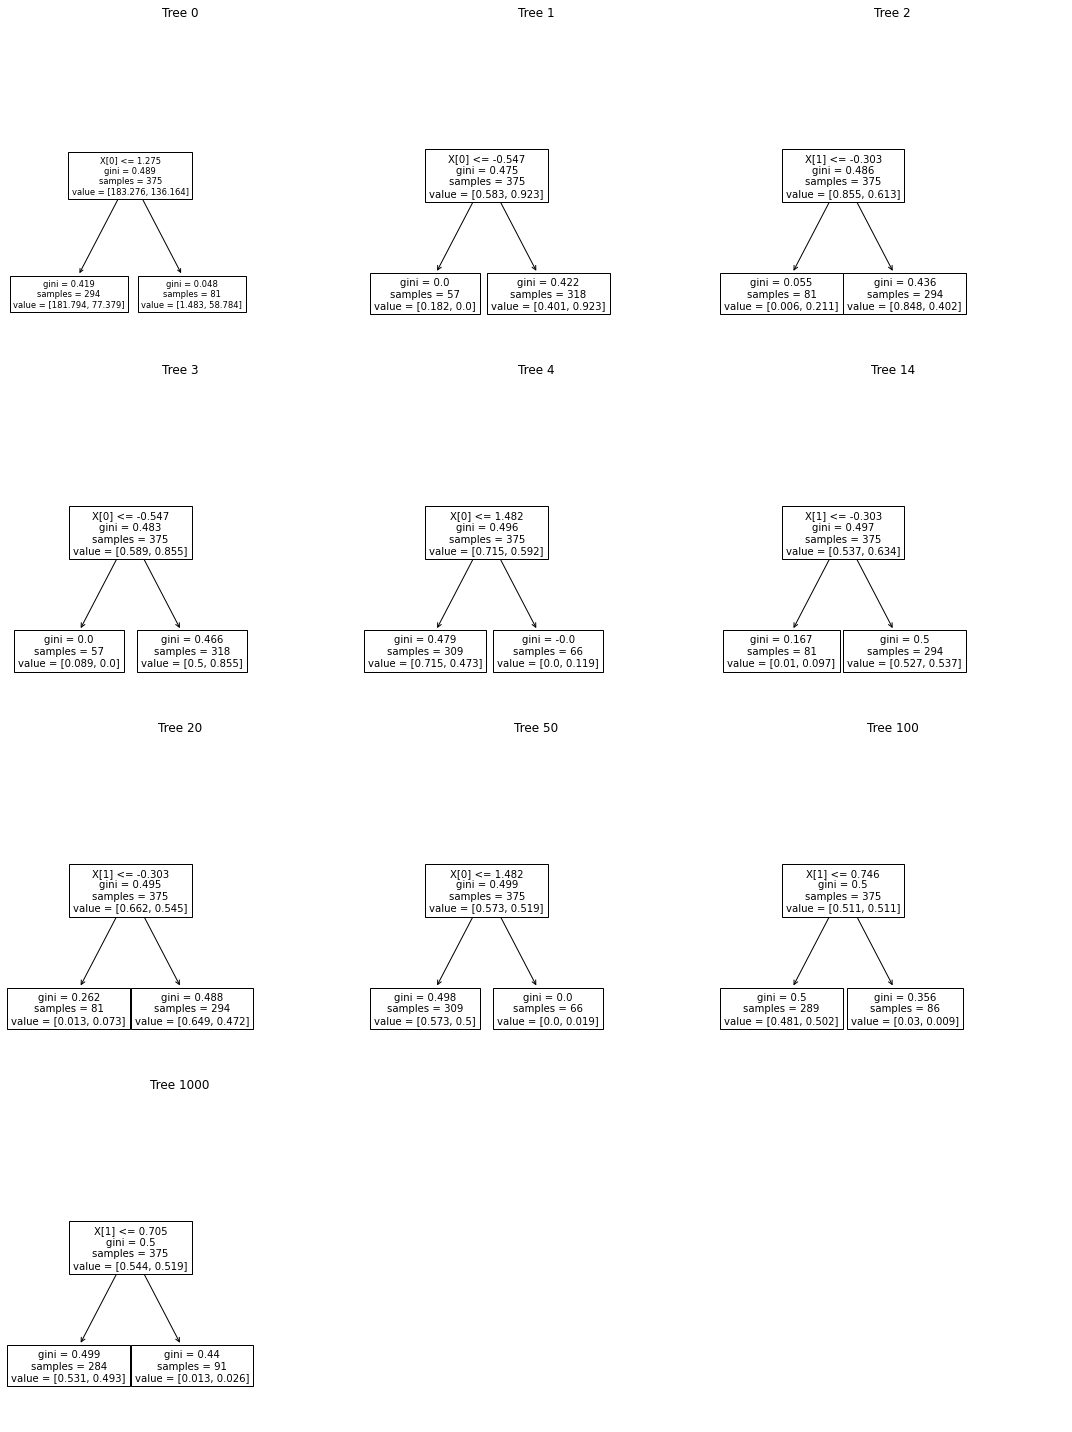

In [186]:
ensindex = [0, 1, 2, 3, 4, 14, 20, 50, 100, 1000]

total_plots = len(ensindex)
total_cols = 3
total_rows = (total_plots + total_cols - 1) // total_cols

fig, axes = plt.subplots(total_rows, total_cols, figsize=(15, 5*total_rows))

for x, index in enumerate(ensindex):
    row = x // total_cols
    col = x % total_cols
    ax = axes[row, col] if total_plots > 1 else axes[col]
    
    clf = DecisionTreeClassifier(max_depth=1, random_state=42)
    clf.fit(X_train, y_train, sample_weight=classfiers[index][1])
    plot_tree(clf, ax=ax)
    ax.set_title(f"Tree {index}")

if total_plots < total_rows * total_cols:
    for x in range(total_plots, total_rows * total_cols):
        row = x // total_cols
        col = x % total_cols
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

<ipython-input-187-f6bd803bbfe5>:17: UserWarning: No contour levels were found within the data range.
  ax.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)


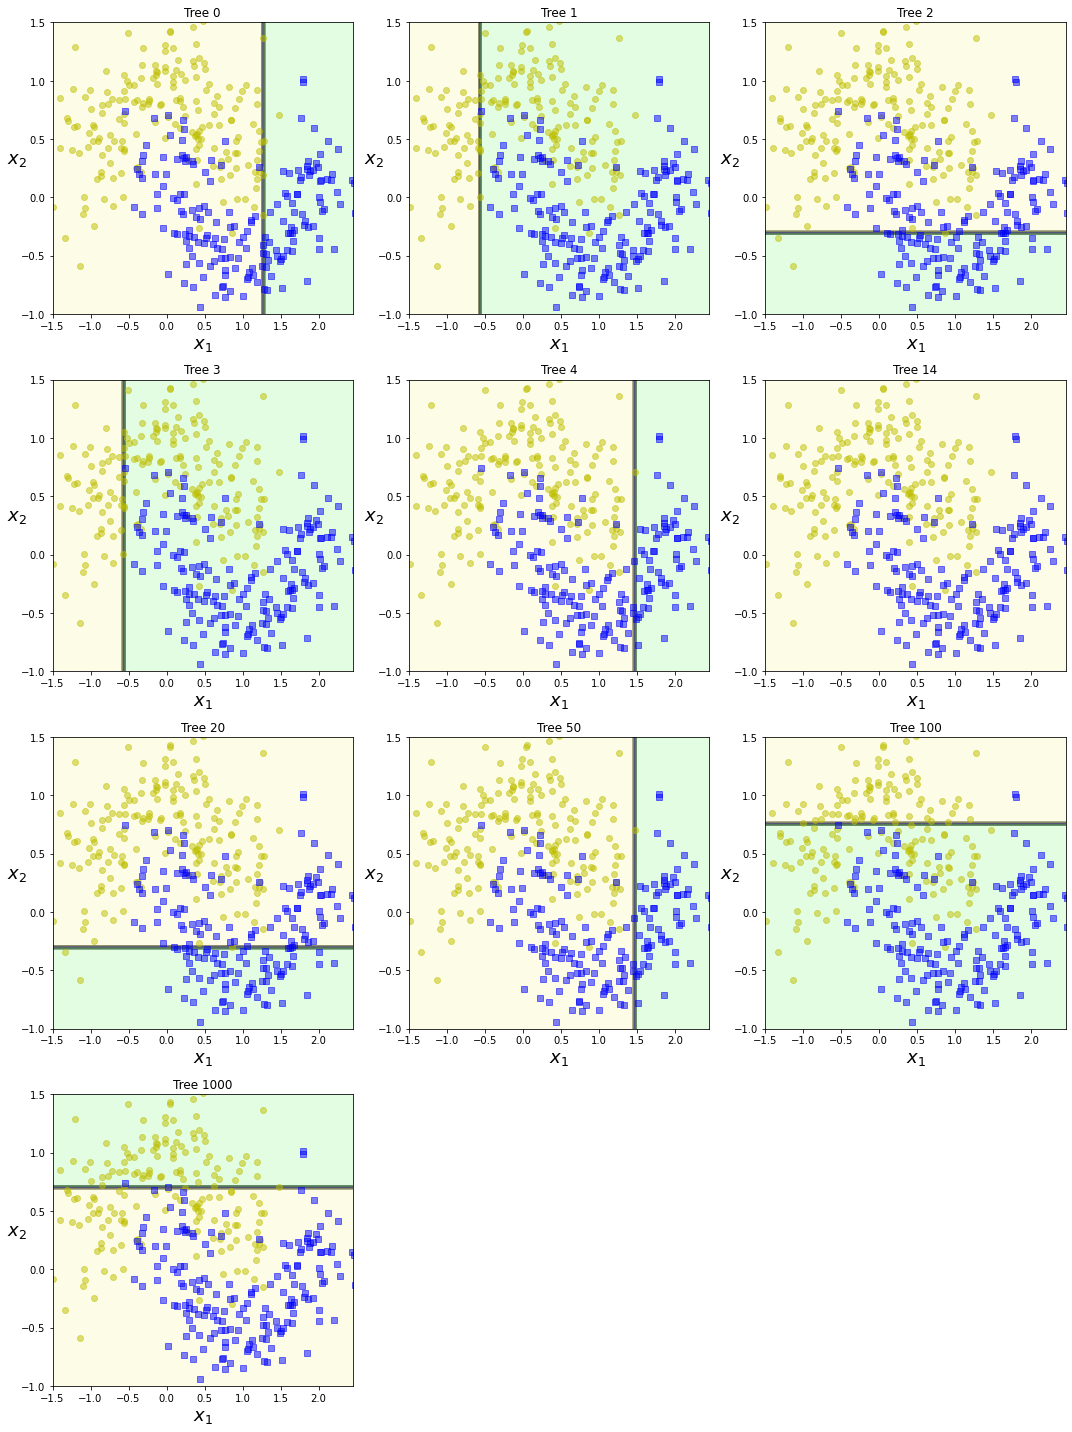

In [187]:
from matplotlib.colors import ListedColormap

def decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True, ax=None):
    if ax is None:
        plt.figure()
        ax = plt.gca()
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        ax.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    ax.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    ax.axis(axes)
    ax.set_xlabel(r"$x_1$", fontsize=18)
    ax.set_ylabel(r"$x_2$", fontsize=18, rotation=0)
    
total_plots = len(ensindex)
total_cols = 3
total_rows = (total_plots + total_cols - 1) // total_cols
fig, axes = plt.subplots(total_rows, total_cols, figsize=(15, total_rows * 5))

for x, index in enumerate(ensindex):
    row = x // total_cols
    col = x % total_cols
    ax = axes[row, col] if total_rows > 1 else axes[col]
    clf = baseclf.fit(X_train, y_train, sample_weight=classfiers[index][1])
    decision_boundary(clf, X_train, y_train, ax=ax)
    ax.set_title(f"Tree {index}")
    

if total_plots < total_rows * total_cols:
    for x in range(total_plots, total_rows * total_cols):
        row = x // total_cols
        col = x % total_cols
        fig.delaxes(axes[row, col])
    
plt.tight_layout()
plt.show()

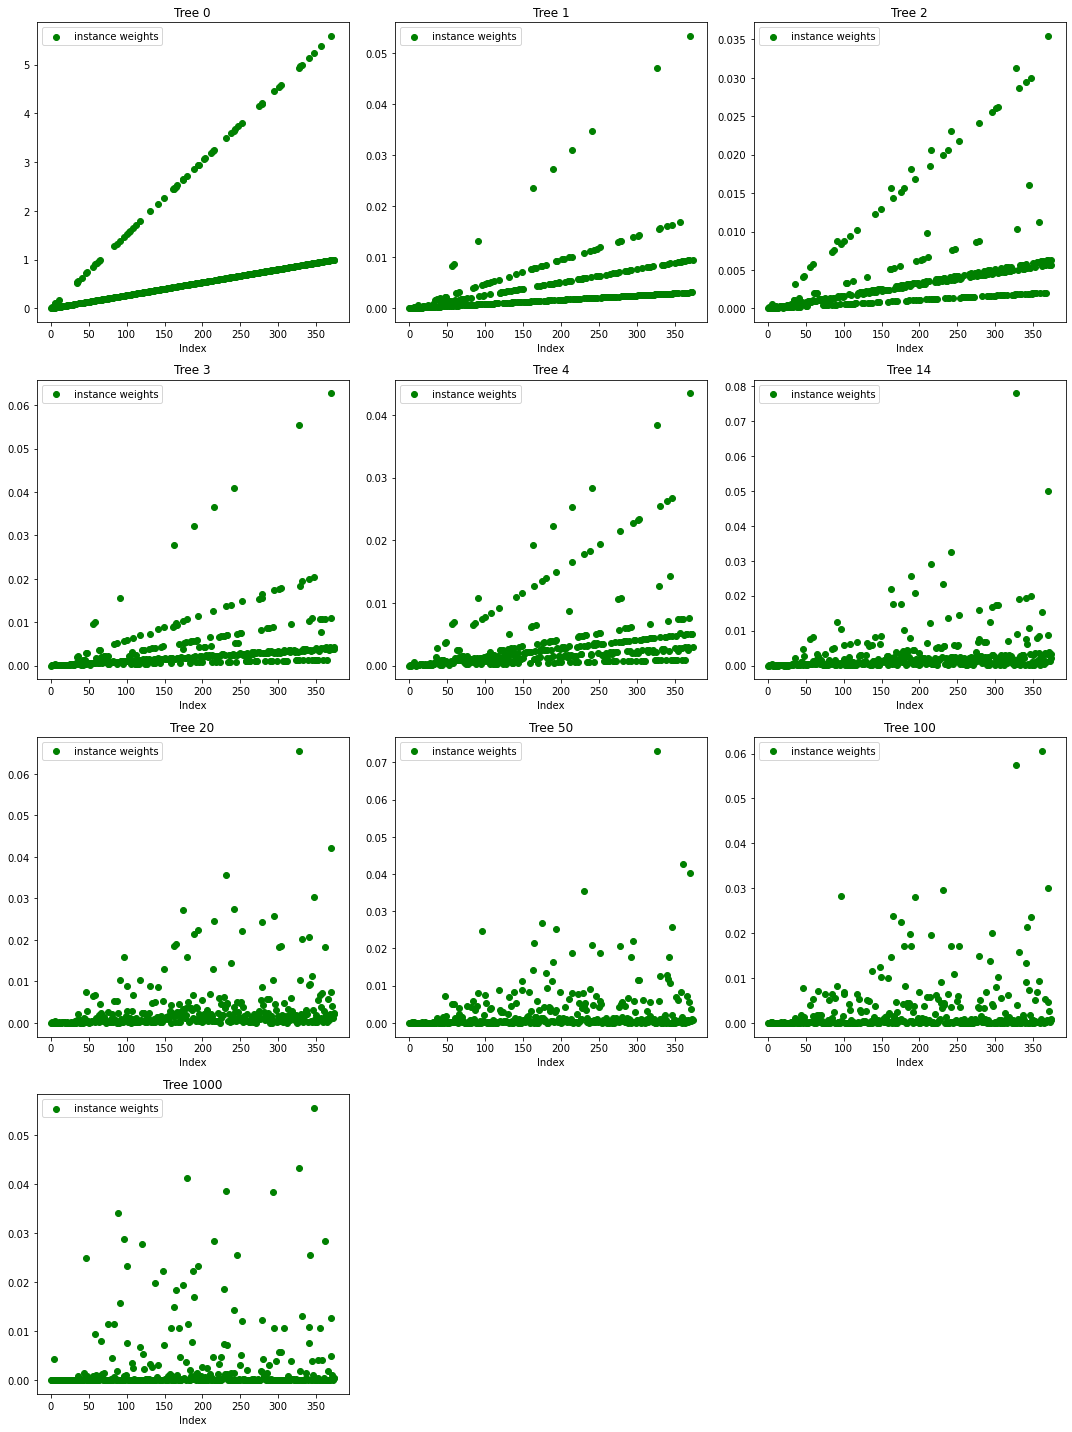

In [190]:
total_plots = len(ensindex)
total_cols = 3
total_rows = (total_plots + total_cols - 1) // total_cols
fig, axes = plt.subplots(total_rows, total_cols, figsize=(15, total_rows * 5))

for x, index in enumerate(ensindex):
    row = x // total_cols
    col = x % total_cols
    ax = axes[row, col] if total_rows > 1 else axes[col]
    x1s = np.arange(len(X_train))
    ax.scatter(x1s, classfiers[index][1], label="instance weights", color='green')
    ax.set_xlabel('Index')
    ax.legend()
    ax.set_title(f"Tree {index}")
    
if total_plots < total_rows * total_cols:
    for x in range(total_plots, total_rows * total_cols):
        row = x // total_cols
        col = x % total_cols
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

<ipython-input-192-958f6140e407>:15: UserWarning: No contour levels were found within the data range.
  ax.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)


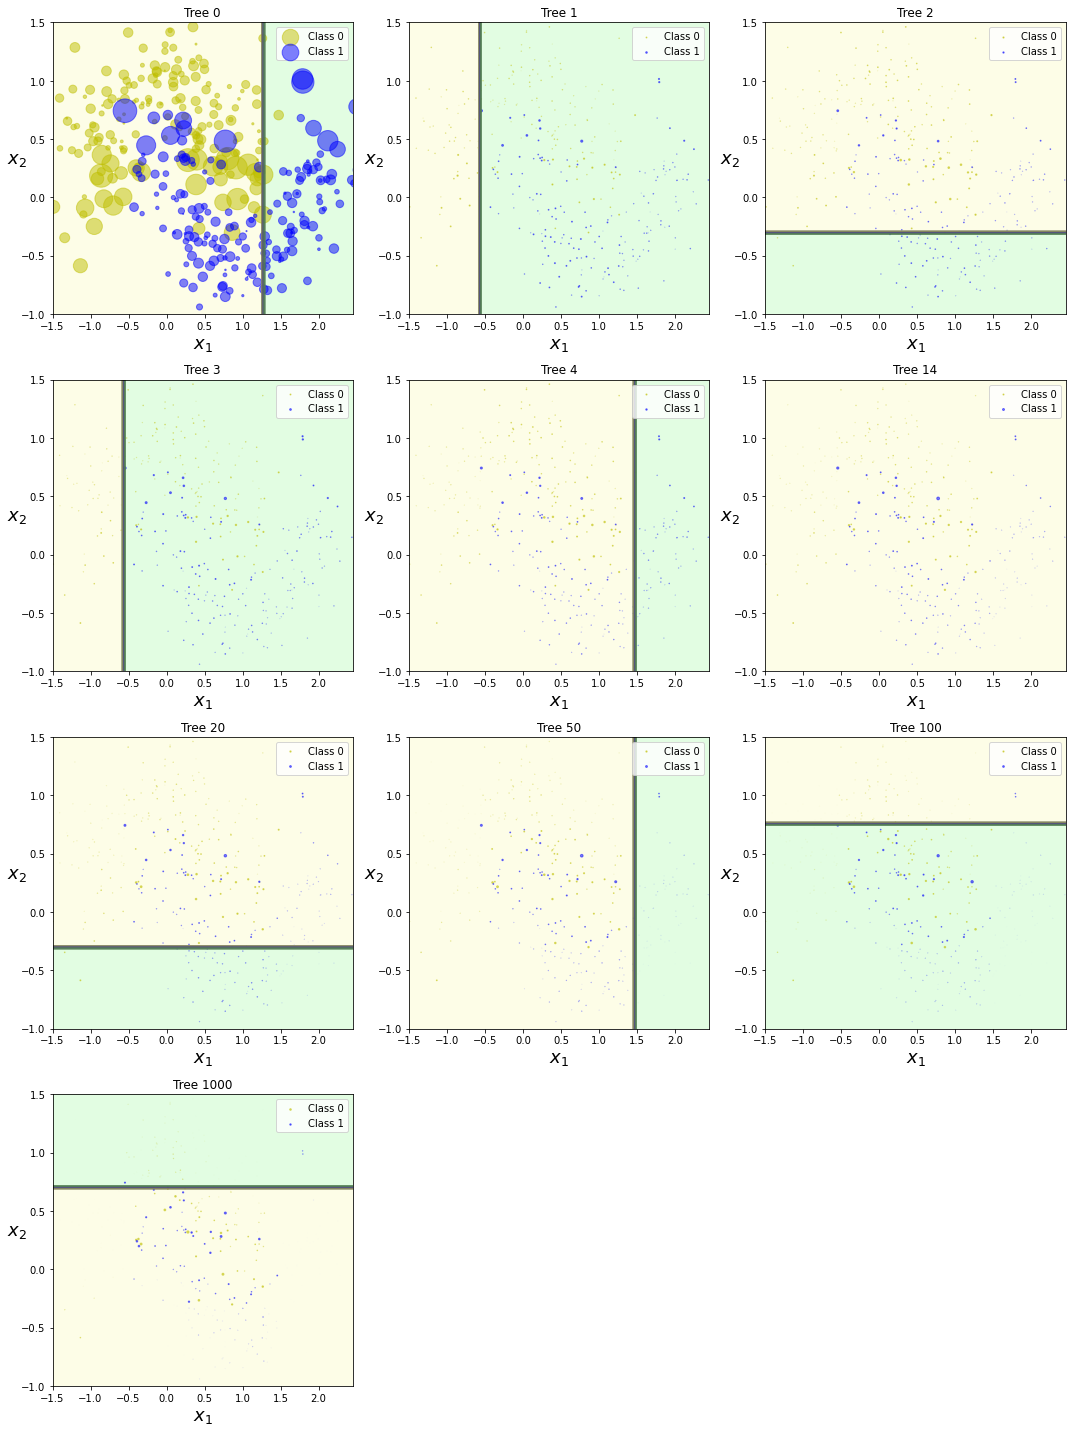

In [192]:
def db_scaled(clf, X, y, wts, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True, ax=None):
    if ax is None:
        plt.figure()
        ax = plt.gca()
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        ax.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    ax.scatter(X[:, 0][y==0], X[:, 1][y==0], c="y", s=100 * wts[y==0], alpha=alpha, label="Class 0")
    ax.scatter(X[:, 0][y==1], X[:, 1][y==1], c="b", s=100 * wts[y==1], alpha=alpha, label="Class 1")
    ax.axis(axes)
    ax.set_xlabel(r"$x_1$", fontsize=18)
    ax.set_ylabel(r"$x_2$", fontsize=18, rotation=0)
    ax.legend()


total_plots = len(ensindex)
total_cols = 3
total_rows = (total_plots + total_cols - 1) // total_cols
fig, axes = plt.subplots(total_rows, total_cols, figsize=(15, total_rows * 5))

for x, index in enumerate(ensindex):
    row = x // total_cols
    col = x % total_cols
    ax = axes[row, col] if total_rows > 1 else axes[col]
    clf = baseclf.fit(X_train, y_train, sample_weight=classfiers[index][1])
    db_scaled(clf, X_train, y_train, classfiers[index][1], ax=ax)
    ax.set_title(f"Tree {index}")

    
if total_plots < total_rows * total_cols:
    for x in range(total_plots, total_rows * total_cols):
        row = x // total_cols
        col = x % total_cols
        fig.delaxes(axes[row, col]) 
    
plt.tight_layout()
plt.show()


### Part 9

<ipython-input-150-245b61372f66>:17: UserWarning: No contour levels were found within the data range.
  ax.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)


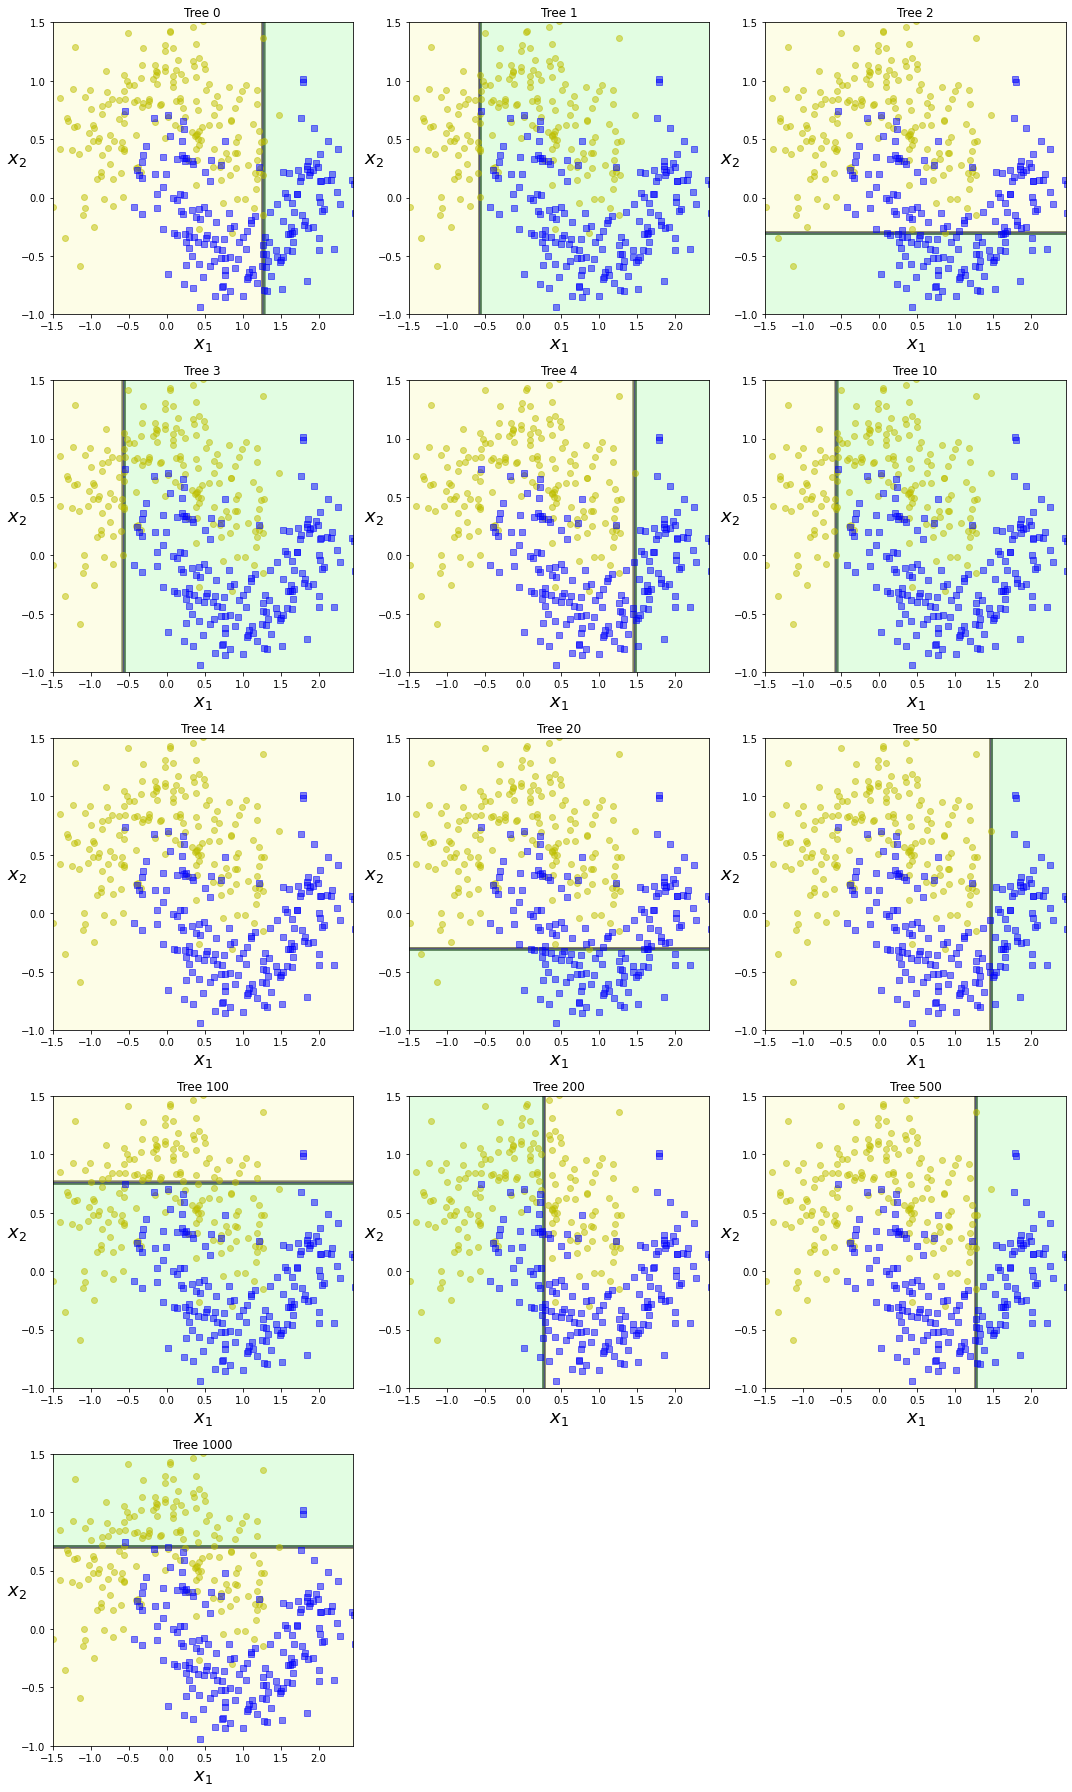

In [193]:
ensindex2 = [0, 1, 2, 3, 4, 10, 14, 20, 50, 100, 200, 500, 1000]
total_plots = len(ensindex2)
total_cols = 3
total_rows = (total_plots + total_cols - 1) // total_cols
fig, axes = plt.subplots(total_rows, total_cols, figsize=(15, total_rows * 5))

for x, index in enumerate(ensindex2):
    row = x // total_cols
    col = x % total_cols
    ax = axes[row, col] if total_rows > 1 else axes[col]
    clf = baseclf.fit(X_train, y_train, sample_weight=classfiers[index][1])
    plot_decision_boundary(clf, X_train, y_train, ax=ax)
    ax.set_title(f"Tree {index}")
    
if total_plots < total_rows * total_cols:
    for x in range(total_plots, total_rows * total_cols):
        row = x // total_cols
        col = x % total_cols
        fig.delaxes(axes[row, col])    

plt.tight_layout()
plt.show()

### Part 10

In this assignment, I learned a few things:

I gained an understanding of the concept of ensemble learning which uses different models in order to improve the performance accuracy overall. I was able to implement the AdaBoost algorithm in order to combine weak learners to create a strong learner. Additionally, I implemented decision trees which are a fundamental concept within AdaBoost. Decision Trees are used as weak learners with limited depth. I have also implemented new plotting techniques and visualizations to depict the effect of different classifiers and other metrics. 